In [95]:
#Importing Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#For preprocessing,Normanlizing
from sklearn.preprocessing import StandardScaler 



In [ ]:
#Problem Defination/Statement:
    
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number 
of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features
that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Predict number of wins (W)

In [70]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head(7)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93


In [10]:
#Describes the stats and propertiesof the dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [12]:
#Displays no of Rows and Columns
df.shape

(30, 17)

In [14]:
#Checking for null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

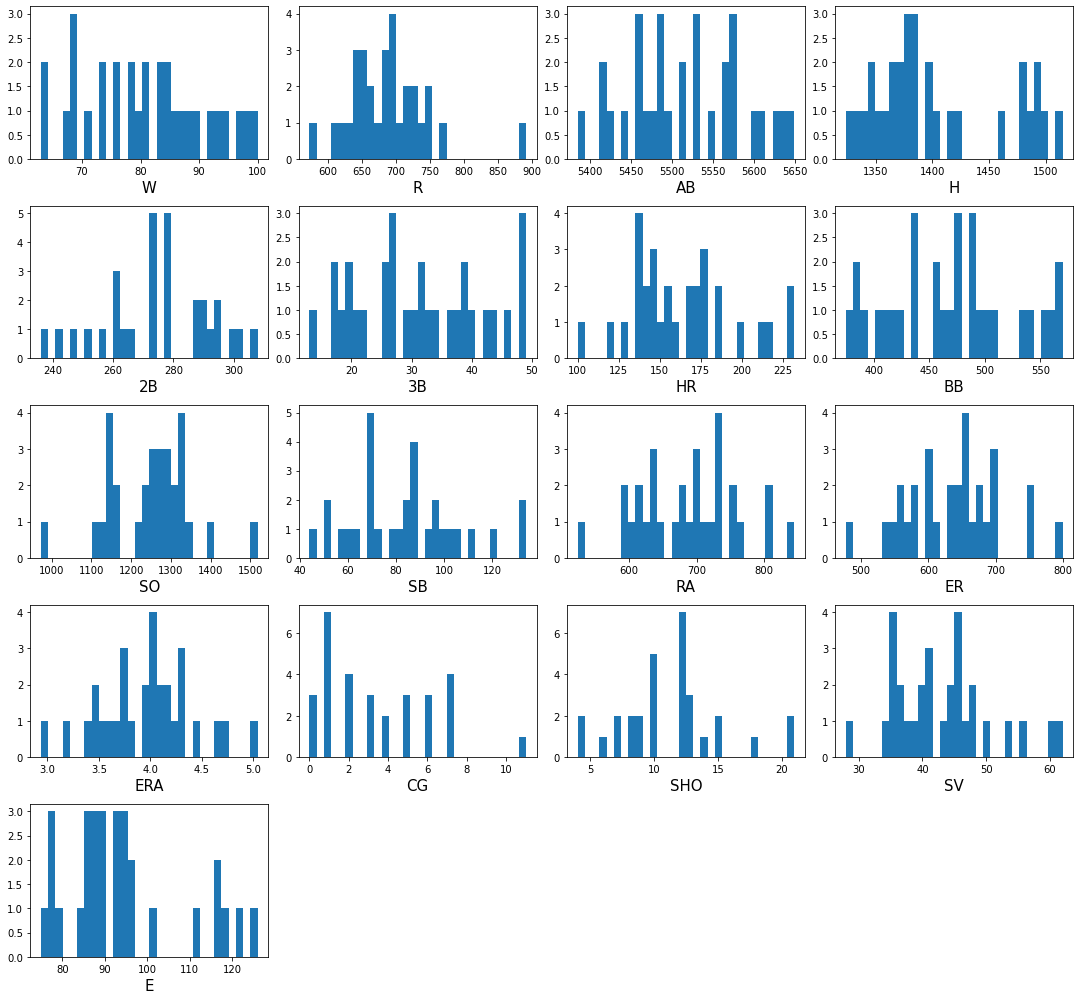

In [38]:
#Checking to see the data distribution
plt.figure(figsize=(15,14))
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()



In [46]:
#Remove skewness observed and making it normally distributed
from scipy.stats import zscore
z_score=zscore(df[['W','2B','R','H','CG','SO','ER','ERA','CG','SHO','SV']])
abs_z_score=np.abs(z_score)
filter_entry=(abs_z_score<3).all(axis=1)
df=df[filter_entry]
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,1400.896552,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,636.758621,3.961724,3.344828,11.344828,43.379310,94.551724
std,10.384006,45.357040,71.701076,56.264265,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,71.195734,0.461148,2.729153,4.185655,7.816712,14.153713
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,650.000000,5463.000000,1363.000000,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,584.000000,3.670000,1.000000,9.000000,38.000000,86.000000
50%,81.000000,689.000000,5511.000000,1382.000000,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,646.000000,4.030000,3.000000,12.000000,43.000000,92.000000
75%,87.000000,713.000000,5571.000000,1420.000000,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,680.000000,4.240000,5.000000,13.000000,47.000000,97.000000
max,100.000000,764.000000,5649.000000,1515.000000,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


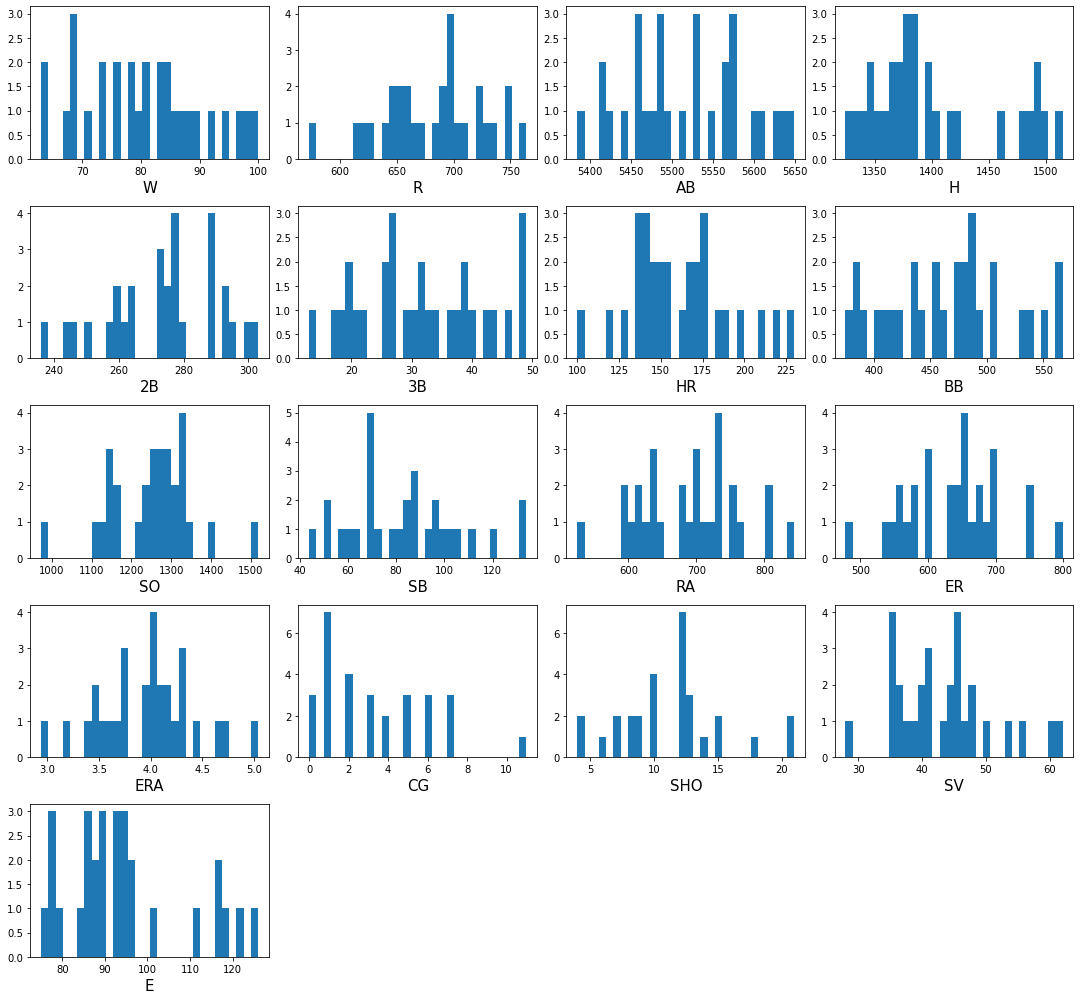

In [47]:
#Checking to see the data distribution after using Zscore
plt.figure(figsize=(15,14))
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [48]:
#Checking and seeing for Multicolinearity 
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
R,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
AB,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
H,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
2B,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
3B,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HR,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
BB,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
SO,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
SB,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


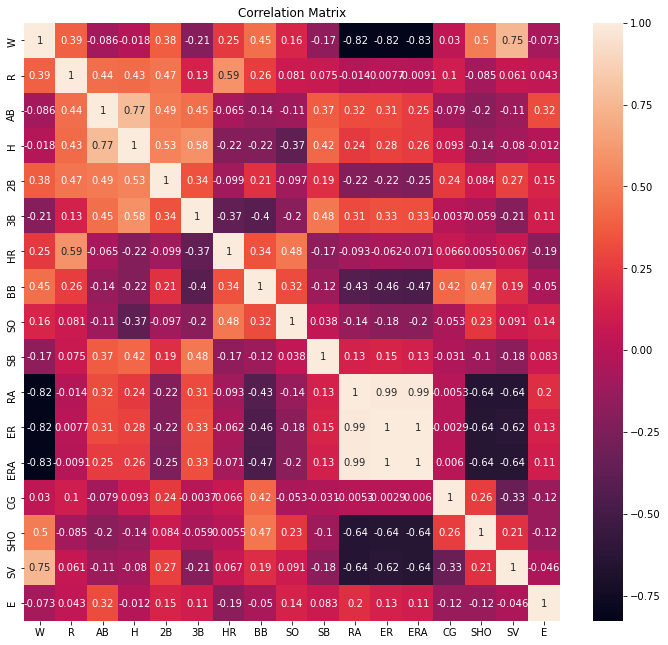

In [50]:
#Using correlarion matrix and plotting the heatmap to find the multicollinearity or coorelation amonmg all variables
corr_matrix=df.corr()
plt.figure(figsize=(12,11))
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [52]:
df.drop('ER',axis=1)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,4.24,5,9,45,119


In [54]:
#Dropping the columns which are tight correlated
df.drop('ERA',axis=1)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,5,9,45,119


In [55]:
#Sepearating the features and target variable/output
x=df.drop(columns=['W'],axis=1)
y=df['W']


In [165]:
#Checking for model accuracy using Ridge,Lasso Regression techniques
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Model Instantiation and Training
LE=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=41)
LE.fit(x_train,y_train)
LE.predict(x_test)

array([84.02446007, 92.74215045, 78.35538025, 81.48023191, 90.42987964,
       82.60503403, 61.8310713 , 86.59228669, 91.44435446])

In [145]:
y_train.head(3)

15    100
9      78
18     68
Name: W, dtype: int64

In [135]:
#Checking how well the model has learned the training data
#Adjusted R2 score
LE.score(x_train,y_train)

0.9860605779320395

In [138]:
#Checking how well the model has learned the test data
LE.score(x_test,y_test)

0.4404310873806756

In [142]:
#Model Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred=LE.predict(x_test)
mean_absolute_error(y_test,y_pred)

6.154295176287737

In [143]:
mean_squared_error(y_test,y_pred)

55.84635913104467

In [144]:
np.sqrt(mean_squared_error(y_test,y_pred))

7.473042160395234

In [153]:
#Checking for Model Overfitting 
#Using Regularization 
from sklearn.linear_model import Lasso,LassoCV
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [158]:
alpha=lasscv.alpha_
alpha

0.093183720668847

In [161]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.093183720668847)

In [163]:
lasso_reg.score(x_test,y_test)

0.7057019416343382

In [ ]:
#Cocluded that model is not overfitting